<a href="https://colab.research.google.com/github/YifanSong348/STATS303/blob/main/HW/%E2%80%9CSTATS303_Week_4_Programming_MCMC%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You can either check the PDF version in below or access the code and result from this colab link: https://colab.research.google.com/drive/19JNSAVbgEitQuu9HlgAJFKhsN1d0jeaX?usp=sharing

#Week 4 - Homework - Yifan Song (ys251)
###Problem 1. Programming: MCMC


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import sympy
import math

##**1.** Use Metropolis-Hastings methods, sample 10000 points following `p(x1, x2)` and plot them. You can use your favourite proposal kernel, or just employ the Gaussian proposal used in the lecture.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


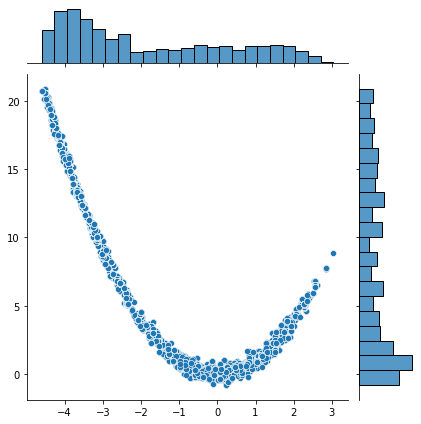

In [ ]:
# mus = np.array([5, 5])
# sigmas = np.array([[1, .9], [.9, 1]])


# def circle(x, y):
#     return (x-1)**2 + (y-2)**2 - 3**2


def pRosenbrock(x, y):
    return math.exp(-(((1-x)**2) + 100*((y-x**2)**2))/20)

def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    # samples = metropolis_hastings(circle, iter=10000)
    # sns.jointplot(samples[:, 0], samples[:, 1])

    samples = metropolis_hastings(pRosenbrock, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])

##**2.** Approximate `s` accordingly

In [ ]:
import sympy as sp 
from sympy import *
from scipy import integrate

In [ ]:
def integrand(y, x):
    'y must be the first argument, and x the second.'
    return (sympy.exp(-(((1-y)**2) + 100*((x-y**2)**2))/20))/(1 + sympy.exp(-(x+y)))

In [ ]:
ans, err = integrate.dblquad(integrand, samples[0, 0], samples[9999, 0],
                   lambda x: samples[0, 0],
                   lambda x: samples[9999, 0])
print (ans)

0.8812263281180668
